# Helpful Links

#### NumPy
* [API Reference](https://numpy.org/)
* [numpy.org User Guide](https://numpy.org/doc/stable/user/)
* [W3Schools Tutorials](https://www.w3schools.com/python/numpy/default.asp)

# Initial Setup

In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt

# Set this to whatever you want
seed = 10

#torch.manual_seed(seed)
#np.random.seed(seed)

%load_ext autoreload
%autoreload 2
%matplotlib inline

# NumPy Arrays

[NumPy](https://numpy.org/devdocs/index.html) is a library that provides a wide range of functionality that is primarily designed around processing [arrays](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

NumPy arrays can be used just like a list.  
For example, let's multiply the matrices, $A=\begin{bmatrix} 1 & 2 \\ 3 & 4\end{bmatrix}$ and $B=\begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix}$

In [2]:

# Make lists
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]

# Make numpy arrays
A_np = np.array(A)
B_np = np.array(B)

# Manually matrix multiply the lists and numpy arrays
list_result = 0
numpy_result = 0
nrows, ncols = 2, 2

for row in range(nrows):
    for col in range(ncols):
        # compute result using lists
        list_result += A[row][col]*B[col][row]

        # compute result using numpy
        numpy_result += A_np[row, col]*B_np[col, row]

print(f'Matrix multiplication on lists: {list_result}')
print(f'Matrix multiplication on numpy arrays: {numpy_result}')

Matrix multiplication on lists: 69
Matrix multiplication on numpy arrays: 69


Q: So why use NumPy arrays?  
A: NumPy arrays are much faster for processing large chunks of data

Take a dot product between arrays of $L=2048$

In this example we'll time a dot product on two 1,000,000 element arrays 
($N=1,000,000$) using numpy's `@` operator

In [3]:
# Make a matrix of random values using numpy
N = 1_000_000
A = np.random.randn(N)
B = np.random.randn(N)

# start timer
start = time.time()

# perform dot product using `@` operator.
# this operator is also used for matrix multiplication
result = A@B

# end timer
end = time.time()
time_arr = end - start

# print results
print(f'result: {result}')
print(f'Matrix multiplication took {time_arr:.05f} seconds')

result: -843.7473211509129
Matrix multiplication took 0.00671 seconds


In this example, we'll time a manual computation of the dot product and
then compare the speed up of numpy over the manual method

In [8]:
# define a simple function for manual matrix multiplication
# this will be used in subsequent cells
def manual_dot(A, B):
    N = len(A)
    result = 0
    for n in range(N):
        result += A[n]*B[n]
    
    return result

# start timer
start = time.time()
result = 0

# perform manual dot product
result = manual_dot(A.tolist(), B.tolist())

# end timer
end = time.time()
time_lst = end - start

print(f'result: {result}')
print(f'Matrix multiplication took {time_lst:.05f} seconds')
print(f'Computing the dot product for N={N:,} using numpy is '
      f'{time_lst/time_arr:.02f} times the speed of a for loop')

result: -843.747321150924
Matrix multiplication took 0.14384 seconds
Computing the dot product for N=1,000,000 using numpy is 21.44 times the speed of a for loop


Now let's see how the speed up looks like across different values of $N$

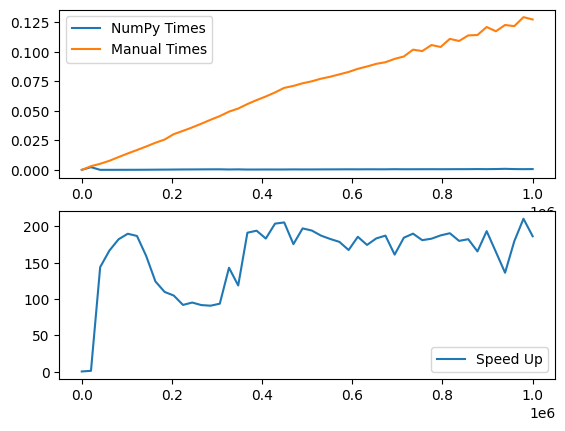

In [9]:
# define number of data points
num_points = 50

# create an array of equidistant N values from 10 to 1,000,000
N_vals = np.linspace(
    10, 
    1_000_000, 
    num_points, 
    dtype=np.int32
)

# initialize arrays of times
np_times = np.zeros(num_points)
man_times = np.zeros(num_points)

# loop over N values
for i, N in enumerate(N_vals):

    # create new arrays of length=
    A = np.random.randn(N)
    B = np.random.randn(N)

    # time the numpy dot product
    start = time.time()
    A@B
    end = time.time()
    np_times[i] = end - start

    # time a manual dot product
    start = time.time()
    manual_dot(A.tolist(), B.tolist())
    end = time.time()
    man_times[i] = end - start

# plot results
fig, ax = plt.subplots(2, 1)

# plot raw times
ax[0].plot(N_vals, np_times, label='NumPy Times')
ax[0].plot(N_vals, man_times, label='Manual Times')
ax[0].legend()

# plot time ratios
ax[1].plot(N_vals, man_times/np_times, label='Speed Up')
ax[1].legend()


# Indexing NumPy Arrays

Working with NumPy arrays are additionally convenient due to the varity
of indexing methods. In this section we will cover a few of them.
You can get a full overview of indexing with NumPy at 
[this link](https://numpy.org/doc/stable/user/basics.indexing.html)

Let's use the following array:

$$
C=\begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6 \\
\end{bmatrix}
$$

In [15]:
# define array
C = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# define a list for other examples
C_lst = C.tolist()

### Basic Indexing

Works just like indexing with lists

In [16]:
# Get the first row of C
print(C[0])

# print the second element of the first row of C
print(C[0][1])

# print the second element of the first row of C_lst
print(C_lst[0][1])

[1 2]
2
2


For numpy, use the following notation to index multi-dimensional arrays
instead of the method above

In [17]:
# Better notation to get the second element of the first row
print(C[0, 1])

2


### Slicing

Similar to python lists, numpy supports the `:` operator with the added
benefit of being usable across multiple dimensions

In [18]:
# Print the original array
print(f'array to be indexed:\n{C}\n')

# Use colon on both axes to return the entirety of C
print(f'using colons for both axes:\n{C[:, :]}\n')

# Use colon to get the first column of all rows in C
print(f'using colon to get the values of the first column: {C[:, 0]}\n')

# Use colon to get the third row of C (equivalent to C[2])
print(f'using colon to get the second row: {C[2, :]}')

array to be indexed:
[[1 2]
 [3 4]
 [5 6]]

using colons for both axes:
[[1 2]
 [3 4]
 [5 6]]

using colon to get the values of the first column: [1 3 5]

using colon to get the second row: [5 6]


### Integer Array Indexing

Use arrays or lists of integers to explicitly select elements across
each dimension

In [63]:
# Print the original array
print(f'array to be indexed:\n{C}\n')

# return an array equivalent to [C[0, 1], C[1, 0], C[2, 1]]
print(f'using lists: {C[[0, 1, 2], [1, 0, 1]]}\n')

# use range() or np.arange() for more convenient notation
print(f'using range(): {C[range(3), [1, 0, 1]]}\n')

# NOTE: using `:` is NOT equivalent to using advanced indexing
print(f'using colon:\n{C[:, [1, 0, 1]]}\n')


array to be indexed:
[[1 2]
 [3 4]
 [5 6]]

using lists: [2 3 6]

using range(): [2 3 6]

using colon:
[[2 1 2]
 [4 3 4]
 [6 5 6]]



# Boolean Indexing

Use arrays of True/False values to `mask` out rows or columns

In [65]:
# Print the original array
print(f'array to be indexed:\n{A}\n')

# Use booleans to mask out the middle row
print(f'middle row masked:\n{A[[True, False, True]]}')

array to be indexed:
[[1 2]
 [3 4]
 [5 6]]

middle row masked:
[[1 2]
 [5 6]]
